In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = "../../data_files/csv_files/marketing_customer_analysis.csv"
data = pd.read_csv(path)

In [4]:
data.head()
data.columns = [i.lower().replace(' ', '_') for i in data.columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [15]:
numerical = data.select_dtypes(include=["float","int"])
categorical = data.select_dtypes(exclude=["float","int"])
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [19]:
pd.concat([data.customer, numerical],axis=1)

customer  customer_lifetime_value  income  monthly_premium_auto  \
0     BU79786              2763.519279   56274                    69   
1     QZ44356              6979.535903       0                    94   
2     AI49188             12887.431650   48767                   108   
3     WW63253              7645.861827       0                   106   
4     HB64268              2813.692575   43836                    73   
...       ...                      ...     ...                   ...   
9129  LA72316             23405.987980   71941                    73   
9130  PK87824              3096.511217   21604                    79   
9131  TD14365              8163.890428       0                    85   
9132  UP19263              7524.442436   21941                    96   
9133  Y167826              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                             0                   1          384.811147  
1                             0                   8         1131.464935  
2                             0                   2          566.472247  
3                             0                   7          529.881344  
4                             0                   1          138.130879  
...                         ...                 ...                 ...  
9129                          0                   2          198.234764  
9130                          0                   1          379.200000  
9131                          3                   2          790.784983  
9132                          0                   3          691.200000  
9133                          0                   1          369.600000  

[9134 rows x 9 columns]

- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 

In [89]:
numerical.iloc[:,0].name

'customer_lifetime_value'

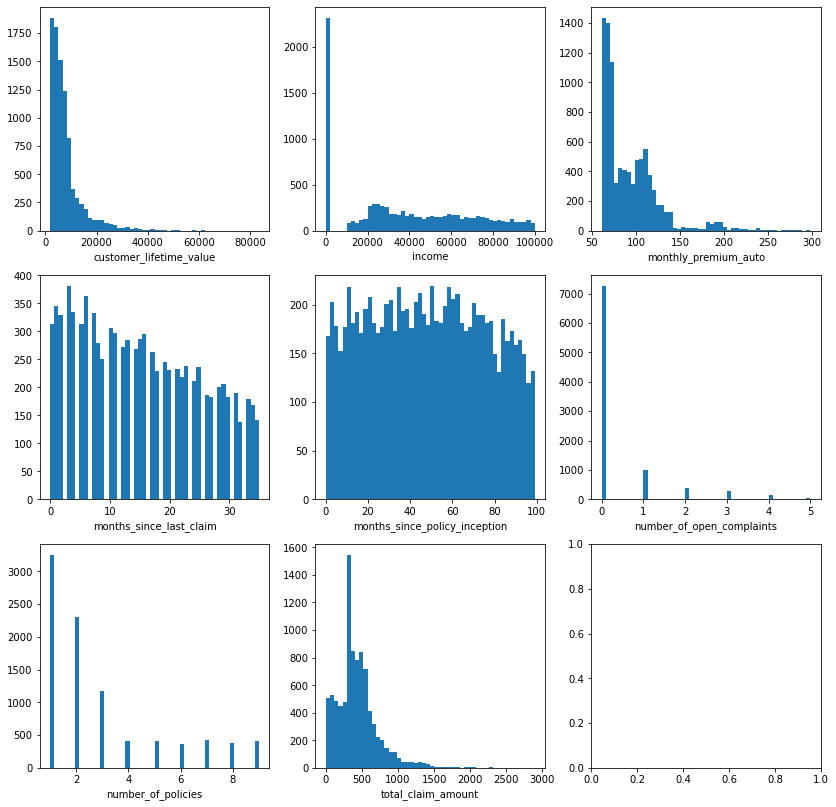

In [98]:
fig, ax = plt.subplots(3,3)
fig.set_figheight(14)
fig.set_figwidth(14)

for i in range(8):
    if i  < 3:
        ax[0,i].hist(x = numerical.iloc[:,i], bins=50)
        ax[0,i].set_xlabel(numerical.iloc[:,i].name)
    elif i  < 6:
        ax[1,i-3].hist(x = numerical.iloc[:,i], bins=50)
        ax[1,i-3].set_xlabel(numerical.iloc[:,i].name)
    else:
        ax[2,i-6].hist(x = numerical.iloc[:,i], bins=50)
        ax[2,i-6].set_xlabel(numerical.iloc[:,i].name)
        
plt.show()

1) There are no plots with normal distibution.
<br>2) **Income** is a weird chart, there are to many 0 values which I would like to inspect what happens if they are taken out.
<br>3) **month_since_last_claim show** a little increase in the claims.
<br> 4) **months_since_policy_inception** is just a uniform distribution.

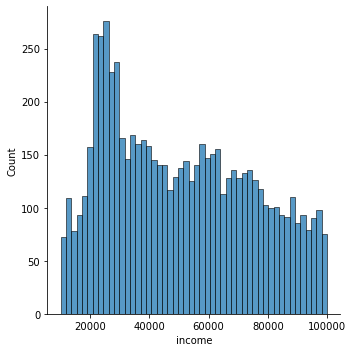

In [76]:
sns.displot(data=data[data.income != 0], x="income", bins=50)
plt.show()

Many reason why people probably have no income. <br> Not a normal distribution, but we can sea there are more people with a 2000-3000 income.

In [82]:
def show_displot(column):
    p = plt.hist(x=data[column], bins=50)
    plt.xlabel(column)
    plt.ylabel("count")
    plt.gcf().set_size_inches(4, 4)
    plt.show()

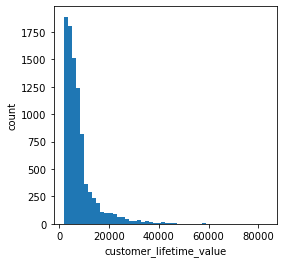

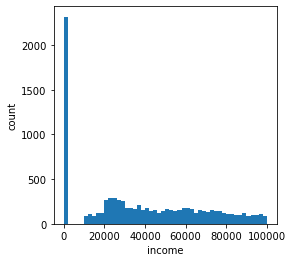

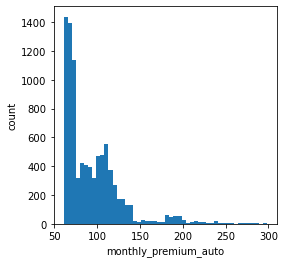

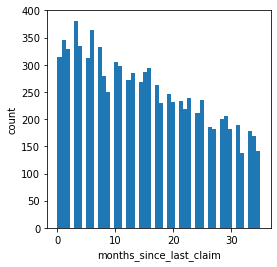

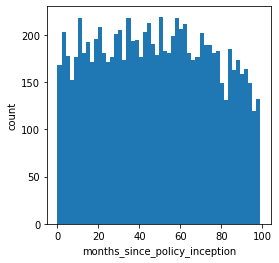

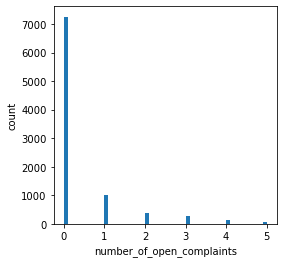

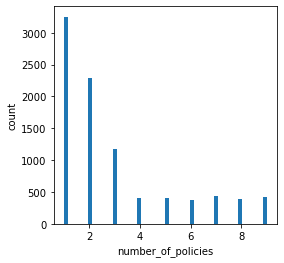

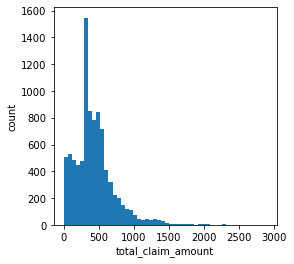

In [83]:
for column in numerical.columns:
    show_displot(column)

- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

<AxesSubplot:>

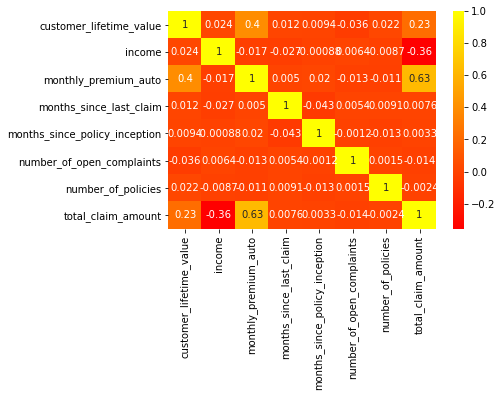

In [93]:
sns.heatmap(numerical.corr(), cmap='autumn', annot=True )

I don't see any colinnearity between this values.

<AxesSubplot:>

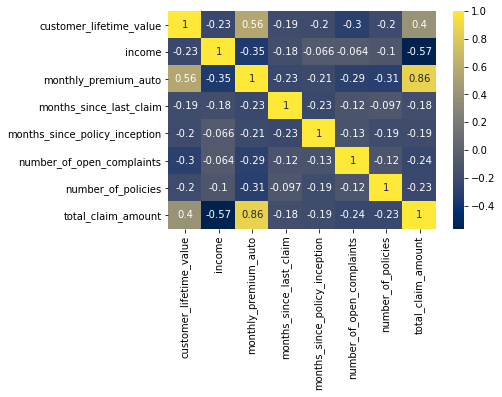

In [117]:
employed_numerical = data[data.employmentstatus != "Unemployed"][numerical.columns].corr()
sns.heatmap(employed_numerical.corr(), 
            cmap='cividis', 
            annot=True )

###### There is an stronger correlation between monthly_premium_auto and total_claim amount when then person is employed (as expected).

In [102]:
data.drop(numerical.columns,axis=1).head(3)

customer       state response  coverage education effective_to_date  \
0  BU79786  Washington       No     Basic  Bachelor           2/24/11   
1  QZ44356     Arizona       No  Extended  Bachelor           1/31/11   
2  AI49188      Nevada       No   Premium  Bachelor           2/19/11   

  employmentstatus gender location_code marital_status     policy_type  \
0         Employed      F      Suburban        Married  Corporate Auto   
1       Unemployed      F      Suburban         Single   Personal Auto   
2         Employed      F      Suburban        Married   Personal Auto   

         policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0  Corporate L3           Offer1         Agent   Two-Door Car      Medsize  
1   Personal L3           Offer3         Agent  Four-Door Car      Medsize  
2   Personal L3           Offer1         Agent   Two-Door Car      Medsize

##### Checking for other columns that could be turned into numerical.

In [106]:
data.vehicle_size.value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64